<a href="https://colab.research.google.com/github/andheartsjaz/Public/blob/master/Classwork_non_normal_drills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv'
df = pd.read_csv(url)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [0]:
def stat_format(test, name, a):
    test_statistic, p_value = test
    print(f'Given {name} test:' + '\n')
    print(f'\t* test statistic {test_statistic:.4f}')
    print(f'\t* p value {p_value:.4f} (p < 0.05 is {p_value < a})' + '\n')
    if p_value < a:
        return 'We can reject the null hpythosesis. \n ---------------------------- \n'
    else:
        return 'We cannot reject the null hypothesis. \n ----------------------------\n'

    
def auto_qq(*plots):
    '''enter in columns as df['column'], df['column2'] OR df.column, df.column2 etc'''
    for plot in plots:
        stats.probplot(plot, dist="norm", plot=plt)
        plt.show()

Did people become less trusting from 2012 to 2014?

In [0]:
a = df[df['year'] == 6]
b = df[df['year'] == 7]

Given 2017 and 2016 trust Kruskal test:

	* test statistic 0.1193
	* p value 0.7298 (p < 0.05 is False)

We cannot reject the null hypothesis. 
 ----------------------------



Given 2012 and 2014 trust Kruskal test:

	* test statistic 0.1193
	* p value 0.7298 (p < 0.05 is False)

We cannot reject the null hypothesis. 
 ----------------------------



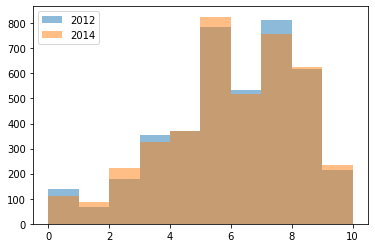

In [0]:
print(stat_format(stats.kruskal(a.ppltrst, b.ppltrst), '2012 and 2014 trust Kruskal', 0.05))

plt.hist(a.ppltrst, alpha=.5)
plt.hist(b.ppltrst, alpha=.5)
plt.legend([2012, 2014], loc='upper left')
plt.show()

Given 2012 and 2014 trust Kruskal test:

	* test statistic 3.7254
	* p value 0.0536 (p < 0.05 is False)

We cannot reject the null hypothesis. 
 ----------------------------



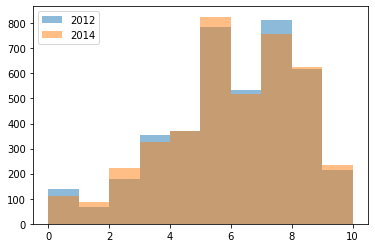

In [0]:
print(stat_format(stats.kruskal(a.happy, b.happy), '2012 and 2014 trust Kruskal', 0.05))

plt.hist(a.ppltrst, alpha=.5)
plt.hist(b.ppltrst, alpha=.5)
plt.legend([2012, 2014], loc='upper left')
plt.show()

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [0]:
x = df[df['year'] == 7]
ch = x[x['cntry'] == 'CH']
cz = x[x['cntry'] == 'CZ']
es = x[x['cntry'] == 'ES']

In [0]:
auto_qq(ch.sclmeet, cz.sclmeet, es.sclmeet, se.sclmeet)

# Performing multiple Shapiro tests for normality:

In [0]:
print(stat_format(stats.shapiro(ch.sclmeet), 'CH social meeting Shapiro', .05))
print(stat_format(stats.shapiro(cz.sclmeet), 'CZ social meeting Shapiro', .05))
print(stat_format(stats.shapiro(es.sclmeet), 'ES social meeting Shapiro', .05))

Given CH social meeting Shapiro test:

	* test statistic 0.8976
	* p value 0.0000 (p < 0.05 is True)

We can reject the null hpythosesis. 
 ---------------------------- 

Given CZ social meeting Shapiro test:

	* test statistic 0.9443
	* p value 0.0000 (p < 0.05 is True)

We can reject the null hpythosesis. 
 ---------------------------- 

Given ES social meeting Shapiro test:

	* test statistic 0.8928
	* p value 0.0000 (p < 0.05 is True)

We can reject the null hpythosesis. 
 ---------------------------- 



We have to use non-normal testing methods due to the nature of the distributions.

# CH and ES are closer in distribution than either compared to CZ 

even if we can reject the null hypothesis:

Given CH and ES social meetings Kruskal test:

	* test statistic 4.5105
	* p value 0.0337 (p < 0.05 is True)

We can reject the null hpythosesis. 
 ---------------------------- 



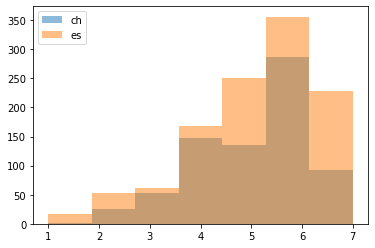

In [0]:
print(stat_format(stats.kruskal(ch.sclmeet, es.sclmeet), "CH and ES social meetings Kruskal", 0.05))
plt.hist(ch.sclmeet, alpha=0.5, bins=7)
plt.hist(es.sclmeet, alpha=0.5, bins=7)
plt.legend(['ch', 'es'], loc='upper left')
plt.show()


Given CH ES SE social meetings Kruskal test:

	* test statistic 126.5241
	* p value 0.0000 (p < 0.05 is True)

We can reject the null hpythosesis. 
 ---------------------------- 



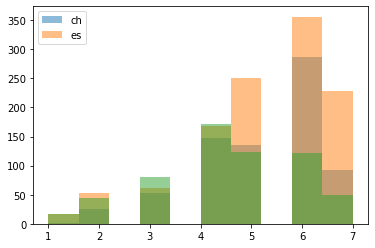

In [0]:
print(stat_format(stats.kruskal(ch.sclmeet, es.sclmeet, cz.sclmeet), "CH ES SE social meetings Kruskal", 0.05))
plt.hist(ch.sclmeet, alpha=0.5, bins=10)
plt.hist(es.sclmeet, alpha=0.5, bins=10)
plt.hist(cz.sclmeet, alpha=0.5, bins=10)
plt.legend(['ch', 'es'], loc='upper left')
plt.show()

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

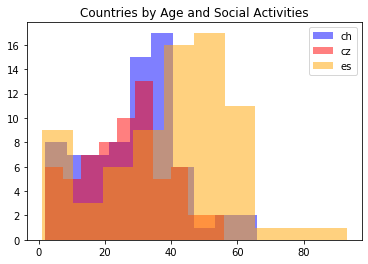

In [0]:
ch_sclact_age = ch.groupby('agea')[['sclact']].sum()
cz_sclact_age = cz.groupby('agea')[['sclact']].sum()
es_sclact_age = es.groupby('agea')[['sclact']].sum()
plt.hist(ch_sclact_age.sclact, alpha = 0.5, color='blue')
plt.hist(cz_sclact_age.sclact, alpha = 0.5, color='red')
plt.hist(es_sclact_age.sclact, alpha = 0.5, color='orange')
plt.legend(['ch', 'cz', 'es'])
plt.title('Countries by Age and Social Activities')
plt.show()

In [0]:
# CZ has a drops off dramatically from social activity sooner than the other two countries.
# ES has the longest life span of engaging in social activies 